# Data 400 Final Project

**Objective**:

Develop a machine learning model that predicts Airbnb property availability in the next 30 days. 

**Dataset**:

- Airbnb listing dataset for Columbus OH: airbnb_listings.csv
- Features include detailed information about the listings, including amenities, host information, pricing, and location
- Target variable, availability_30, captures high, medium, low bookings in the next 30 days
- Data dictionary: Inside Airbnb Data Dictionary Listings.pdf
- Data source: Inside Airbnb. (n.d.). Inside Airbnb: Adding data to the debate. Retrieved 2024, from http://insideairbnb.com/get-the-data.html



## Imports

In [1]:
import ast
from itertools import chain
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string

### Config

In [2]:
nltk.download('stopwords')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)


# If your using dark mode I suggest these config settings! Otherwise comment out
# The following plot rcParams change the background to a gray
plt.rcParams['figure.facecolor'] = 'dimgray'
plt.rcParams['axes.facecolor'] = 'dimgray'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thema\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Exploratory data analysis (EDA)

- Conduct a thorough analysis of the dataset
- Identify missing values, outliers, and any data quality issues
- Provide descriptive statistics and visualizations to understand patterns, relationships, and data distribution 

### Preview Data

In [3]:
df = pd.read_csv('airbnb_listings.csv')
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_30
0,0,90676,https://www.airbnb.com/rooms/90676,20240626142012,2024-06-26,city scrape,Short North - Italianate Cottage,Just steps from High Street and all the action...,The Short North Italianate Cottage is located ...,https://a0.muscache.com/pictures/950e43cd-53f3...,483306,https://www.airbnb.com/users/show/483306,Audra & Lacey,2011-04-04,"Columbus, OH","Active, young professionals who love to travel...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/483306/profil...,https://a0.muscache.com/im/users/483306/profil...,NaN,3,3,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Near North/University,NaN,39.98366,-83.00252,Entire home,Entire home/apt,6,2.0,2 baths,3.0,3.0,"[""Exterior security cameras on property"", ""Fir...",$127.00,1,365,1,1,365,365,1.0,365.0,NaN,t,39,63,143,2024-06-26,772,103,7,2011-10-11,2024-06-22,4.81,4.85,4.82,4.93,4.87,4.92,4.77,2022-2475,f,3,3,0,0,4.99,medium
1,1,543140,https://www.airbnb.com/rooms/543140,20240626142012,2024-06-26,city scrape,Private queen bedroom 1 - N.Campus,"Private, second-floor queen bed with desk, ple...",We are close to a lot of things!,https://a0.muscache.com/pictures/e720cdf0-e36b...,2350409,https://www.airbnb.com/users/show/2350409,Edward,2012-05-11,"Columbus, OH","Hello, hello.\r\n\r\nAbout me: pretty easy goi...",within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/7d46e...,https://a0.muscache.com/im/pictures/user/7d46e...,NaN,1,4,"['email', 'phone', 'work_email']",t,f,Neighborhood highlights,Near North/University,NaN,40.01114,-83.01005,Private room in home,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Heatin...",$36.00,7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,4,19,282,2024-06-26,138,12,0,2012-07-31,2024-05-26,4.70,4.74,4.34,4.93,4.88,4.77,4.78,2019-1344,f,1,0,1,0,0.95,low
2,2,591101,https://www.airbnb.com/rooms/591101,20240626142012,2024-06-26,city scrape,Bellows Studio Loft Apartment,Famous American artist George Bellows home wit...,A historic neighborhood of beautiful victorian...,https://a0.muscache.com/pictures/32b28442-ddf3...,2889677,https://www.airbnb.com/users/show/2889677,Gail,2012-07-10,"Columbus, OH","My husband Eric and I are both artists, sharin...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/e7975...,https://a0.muscache.com/im/pictures/user/e7975...,NaN,1,1,"['email', 'phone']",t,f,Neighborhood highlights,Near East,NaN,39.96041,-82.98005,Private room in loft,Private room,2,1.0,1 private bath,1.0,1.0,"[""Wine glasses"", ""Cleaning products"", ""Room-da...",$110.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,46,72,345,2024-06-26,308,22,3,2012-08-10,2024-06-23,4.93,

In [4]:
df.shape

(2432, 76)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    2432 non-null   int64  
 1   id                                            2432 non-null   int64  
 2   listing_url                                   2432 non-null   object 
 3   scrape_id                                     2432 non-null   int64  
 4   last_scraped                                  2432 non-null   object 
 5   source                                        2432 non-null   object 
 6   name                                          2432 non-null   object 
 7   description                                   2412 non-null   object 
 8   neighborhood_overview                         1634 non-null   object 
 9   picture_url                                   2432 non-null   o

In [6]:
X = df.drop(columns='availability_30')
y = df['availability_30']
target_mapping = {'low': 0, 'medium': 1, 'high': 2}
y_numeric = y.map(target_mapping)

### Summary Statistics

In [7]:
X.describe()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2432.00000,2.432000e+03,2.432000e+03,2.432000e+03,2432.000000,2432.000000,0.0,2432.000000,2432.000000,2432.000000,2381.000000,2422.000000,2381.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,0.0,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2155.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2432.000000,2432.000000,2432.000000,2432.000000,2155.000000
mean,1215.50000,6.246186e+17,2.024063e+13,2.400893e+08,50.906250,77.680921,NaN,39.983140,-82.990719,5.077303,1.559849,2.080925,2.607728,8.162418,535.388980,7.396382,9.533306,705.155016,799.062089,8.790748,769.715461,NaN,31.865954,53.651316,214.777549,57.370477,18.977385,1.909951,4.784455,4.827863,4.772861,4.880831,4.888565,4.715007,4.734468,12.245066,10.885691,1.046875,0.029194,2.304255
std,702.20225,4.388163e+17,1.074440e+00,1.793149e+08,272.315221,432.223571,NaN,0.040408,0.040922,3.271071,0.854111,1.275729,2.167911,15.776499,425.893097,13.743820,16.736412,459.749460,424.199315,15.045330,423.490138,NaN,18.976184,26.985944,111.235636,93.922623,24.712629,2.988066,0.339578,0.299635,0.361425,0.244351,0.263292,0.404743,0.377707,16.840847,17.017355,2.915981,0.266710,2.012172
min,0.00000,9.067600e+04,2.024063e+13,7.876100e+04,1.000000,1.000000,NaN,39.833805,-83.174140,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,607.75000,5.186807e+07,2.024063e+13,7.728490e+07,2.000000,3.000000,NaN,39.955539,-83.006772,2.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000,2.000000,365.000000,365.000000,1.200000,365.000000,NaN,18.000000,37.000000,129.000000,4.000000,2.000000,0.000000,4.730000,4.790000,4.710000,4.860000,4.890000,4.620000,4.680000,2.000000,1.000000,0.000000,0.000000,0.800000
50%,1215.50000,7.771135e+17,2.024063e+13,1.942811e+08,7.000000,8.000000,NaN,39.978000,-82.997925,4.000000,1.000000,2.000000,2.000000,2.000000,365.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,34.000000,59.000000,228.000000,20.000000,11.000000,1.000000,4.880000,4.920000,4.880000,4.950000,4.960000,4.840000,4.830000,5.000000,3.000000,0.000000,0.000000,1.840000
75%,1823.25000,9.890660e+17,2.024063e+13,4.318945e+08,22.000000,28.000000,NaN,39.997607,-82.973275,6.000000,2.000000,3.000000,3.000000,4.000000,1125.000000,3.000000,11.000000,1125.000000,1125.000000,10.000000,1125.000000,NaN,48.000000,75.000000,325.000000,70.000000,27.000000,3.000000,4.970000,5.000000,4.980000,5.000000,5.000000,4.960000,4.930000,15.000000,14.000000,0.000000,0.000000,3.275000
max,2431.00000,1.186348e+18,2.024063e+13,5.831004e+08,2868.000000,4216.000000,NaN,40.147290,-82.782440,16.000000,10.000000,12.000000,30.000000,365.000000,1125.000000,365.000000,365.000000,1125.000000,1125.000000,365.000000,1125.000000,NaN,60.000000,90.000000,365.000000,879.000000,510.000000,88.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,80.000000,80.000000,19.000000,3.000000,22.6

In [8]:
X.describe(include='object')

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,2432,2432,2432,2432,2412,1634,2432,2432,2432,2432,1992,1504,2322,2322,2365,2326,2432,2432,2193,2432,2432,2432,1634,2432,2432,2432,2431,2432,2376,2426,2432,2155,2155,2100,2432
unique,2432,1,2,2400,2090,1107,2396,886,654,800,88,448,4,32,53,2,852,852,148,4,2,2,1,27,35,4,24,2332,393,1,1,1055,316,1664,2
top,https://www.airbnb.com/rooms/90676,2024-06-26,city scrape,Chic 1BR near Childrens Hospital,Explore a variety of attractions within easy r...,"Located in the heart of the city, our listing ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/158439641,GH Hospitality,2017-11-12,"Columbus, OH",To serve guests with a quality experience thro...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/f8509...,https://a0.muscache.com/im/pictures/user/f8509...,South Columbus,"['email', 'phone']",t,t,Neighborhood highlights,Near North/University,Entire home,Entire home/apt,1 bath,"[""Fire extinguisher"", ""TV"", ""Wifi"", ""Building ...",$100.00,t,2024-06-26,2023-03-05,2024-06-23,Exempt,f
freq,1,2432,2382,8,17,20,7,80,80,80,1616,80,2088,1827,615,1260,80,80,310,1777,2381,2187,1634,774,963,2018,1176,17,66,2426,2432,17,305,58,1637


In [9]:
# Uncomment for all rows in results
# pd.set_option('display.max_rows', None)

categorical_columns = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(X[col].value_counts())

# Resets max_rows to default
# pd.set_option('display.max_rows', 60)


Value counts for listing_url:
listing_url
https://www.airbnb.com/rooms/90676                  1
https://www.airbnb.com/rooms/923880283490901188     1
https://www.airbnb.com/rooms/922412152677412443     1
https://www.airbnb.com/rooms/922418916415987738     1
https://www.airbnb.com/rooms/922762159799418019     1
                                                   ..
https://www.airbnb.com/rooms/579130318703653698     1
https://www.airbnb.com/rooms/579920153215435176     1
https://www.airbnb.com/rooms/580147427622115239     1
https://www.airbnb.com/rooms/581933877357049763     1
https://www.airbnb.com/rooms/1186348038466244922    1
Name: count, Length: 2432, dtype: int64

Value counts for last_scraped:
last_scraped
2024-06-26    2432
Name: count, dtype: int64

Value counts for source:
source
city scrape        2382
previous scrape      50
Name: count, dtype: int64

Value counts for name:
name
Chic 1BR near Childrens Hospital                     8
Luxury Studio Suite | Downtown Columbus   

picture_url:
There are multiple records with the same photo. May be duplicate listings, or fake listings using an existing photo?

In [10]:
# Columns that could be parsed for keywords that may give more insight
columns_to_parse = [
    'name',
    'description',
    'neighborhood_overview',
    'host_about',
    'amenities'
]

binary_categories = [
    'host_has_profile_pic',
    'host_identity_verified',
    'host_is_superhost',
    'has_availability',
    'instant_bookable'
]

nominal_categories = [
    'host_url',
    'host_location',
    'host_neighbourhood',
    'host_verifications',
    'neighbourhood_cleansed',
    'property_type',
    'room_type'
]

ordinal_categories = [
    'host_since',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'price',
    'first_review',
    'last_review',
    'license'
]

# Removes all features that 
# are identifiers of a single row, 
# are the same for all rows, 
# or are offering the same information from another feature, (ie. host identifiers/ keeping host_url and removing host_name and host_thumbnail_url)
categorical_columns_to_remove = [
    'source',
    'listing_url',
    'last_scraped',
    'calendar_last_scraped',
    'host_name',
    'host_thumbnail_url',
    'picture_url',
    'neighbourhood',
    'host_picture_url',
    'bathrooms_text'
]

categorical_columns = [item for item in categorical_columns if item not in categorical_columns_to_remove]

In [11]:
pd.set_option('display.max_rows', None)
print(X.isnull().sum())
pd.set_option('display.max_rows', 60)

Unnamed: 0                                         0
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       20
neighborhood_overview                            798
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    440
host_about                                       928
host_response_time                               110
host_response_rate                               110
host_acceptance_rate                          

A quick check on nulls shows we have some features that are entirely empty. I also notice some features have the same amount of missing values and I wonder if they are the same rows with missing values. Finally there is a range of non-zero amounts of missing values from as low as 20 to as many as the entire data set. We will handle all of the missing values in the Feature Engineering section.

### Data Distributions

The following graphs are to get an idea of the distribution of each feature, we can dig deeper into each if we see a distribution we want to examine closer. For now its to see the shapes of each graph.

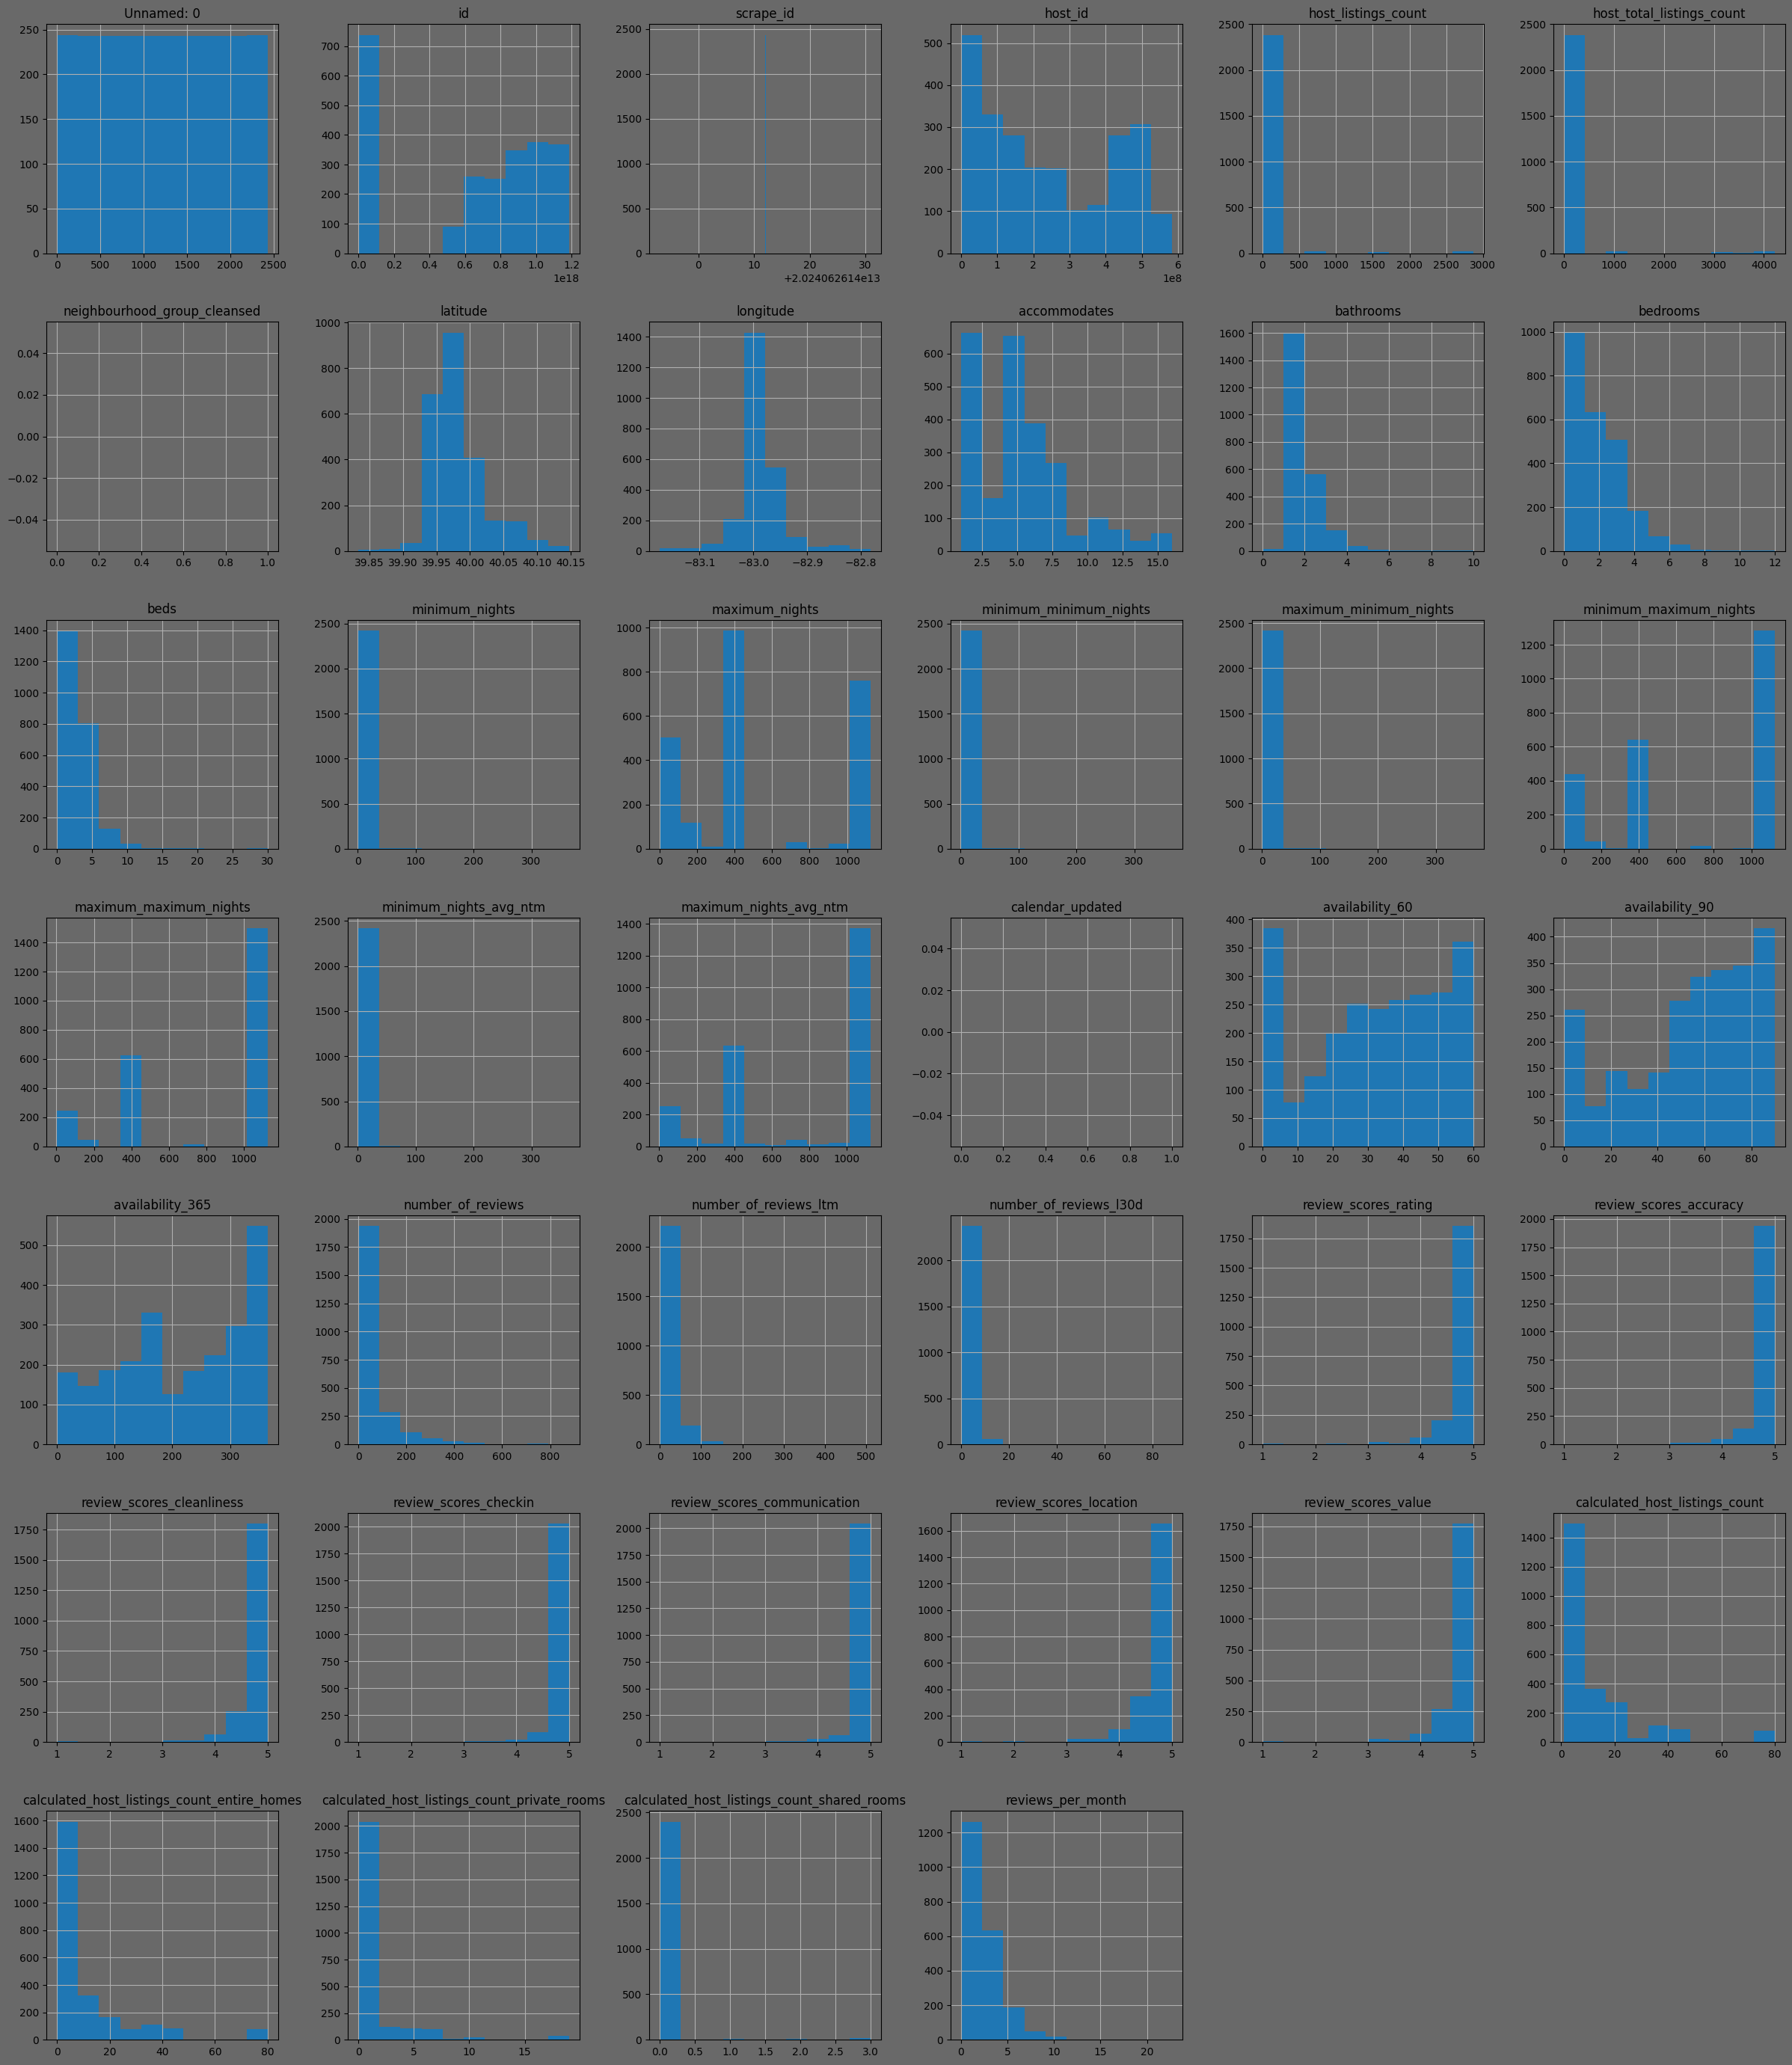

In [12]:
X.hist(figsize=(30, 35))
plt.show()

Time to handle our features that need parsed.

In [13]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        words = text.split()
        stop_words = set(stopwords.words('english'))
        custom_stops = {'airbnb', 'house', 'home', 'apartment', 'room', 'property'}
        stop_words.update(custom_stops)
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''

Amenities are already cleaned and need handled differently then the rest. I will start there by placing each possible amenity into its own group and create dummy columns on if each listing has each category of amenity or not.

In [14]:
# Convert the string representations to actual lists
X['amenities'] = X['amenities'].apply(ast.literal_eval)

# Now flatten the amenities column and get unique values
all_amenities = set(chain.from_iterable(X['amenities']))

for amenity in all_amenities:
    print(amenity)

Maytag  gas stove
Clothing storage: closet
Shared BBQ grill: electric
Exercise equipment: elliptical, free weights, stationary bike, treadmill, yoga mat, workout bench, rowing
HDTV with Amazon Prime Video, Netflix, Hulu
H2O conditioner
Dryer
55 inch HDTV with Fire TV
Whirpool refrigerator
TV with Amazon Prime Video, Disney+, Hulu, Netflix
GE gas stove
Thermador stainless steel gas stove
36 inch TV with Amazon Prime Video, Fire TV, standard cable, premium cable, Netflix, Hulu
65 inch HDTV with Amazon Prime Video, Disney+, Netflix, Hulu, Roku, standard cable
Fast wifi – 358 Mbps
Jenn Air stainless steel single oven
HDTV with Disney+, Apple TV, Netflix, Amazon Prime Video, HBO Max, Hulu, premium cable
Oven
Free parking on premises – 2 spaces
Shampoo
Wifi – 25 Mbps
Z Line Gourmet single oven
36 inch HDTV with HBO Max, Hulu, Netflix, Roku
Fast wifi – 202 Mbps
Double oven
Dove and multiple brands  conditioner
SONOS Bluetooth sound system
Sound system with Bluetooth and aux
HDTV with premium 

In [15]:
luxury_amenities = [
    'beach',
    'garage',
    'sauna',
    'jacuzzi',
    'pool',
    'hot tub',
    'private gym',
    'movie theater',
    'indoor fireplace',
    'private hot tub',
    'private pool',
    'waterfront',
    'beachfront',
    'valley view',
    'lake view',
    'city skyline view'
]

security_amenities = [
    'lockbox',
    'smart lock',
    'security cameras',
    'exterior security cameras',
    'window guards',
    'lock on bedroom door',
    'smoke alarm',
    'carbon monoxide alarm',
    'first aid kit',
    'fire extinguisher'
]

entertainment_amenities = [
    'speaker',
    'wifi',
    'sound system',
    'bluetooth sound system',
    'Hulu',
    'Prime Video',
    'Netflix',
    'TV',
    'HDTV',
    'Roku',
    'Disney+',
    'Chromecast',
    'Apple TV',
    'Piano',
    'pool table',
    'game console',
    'ping pong table',
    'bowling alley',
    'arcade games',
    'record player',
    'board games'
]

comfort_amenities = [
    'shampoo',
    'conditioner',
    'body soap',
    'coffee machine',
    'coffee maker',
    'parking',
    'dryer',
    'air conditioning',
    'heating',
    'ceiling fan',
    'portable fans',
    'central air conditioning',
    'radiant heating',
    'extra pillows and blankets',
    'hangers',
    'iron',
    'hair dryer',
    'bidet'
]

outdoor_amenities = [
    'patio',
    'grill',
    'bbq grill',
    'outdoor kitchen',
    'outdoor furniture',
    'outdoor dining area',
    'backyard',
    'fire pit',
    'outdoor shower',
    'sun loungers',
    'hammock'
]

fitness_amenities = [
    'gym',
    'exercise equipment',
    'treadmill',
    'elliptical',
    'stationary bike',
    'free weights',
    'yoga mat',
    'workout bench',
    'climbing wall',
    'batting cage'
]

family_amenities = [
    "children's books",
    "children's toys",
    'crib',
    'high chair',
    'changing table',
    'baby bath',
    'baby monitor',
    'baby safety gates',
    'outlet covers',
    'table corner guards',
    "children's dinnerware",
    "children's playroom"
]

work_amenities = [
    'workspace',
    'wifi',
    'ethernet connection',
    'desk'
]

cooking_amenities = [
    'oven',
    'stove',
    'coffee machine',
    'coffee maker',
    'fridge',
    'refrigerator',
    'freezer',
    'microwave',
    'dishwasher',
    'toaster',
    'blender',
    'rice maker',
    'bread maker',
    'hot water kettle',
    'wine glasses',
    'dishes and silverware',
    'cooking basics',
    'baking sheet',
    'trash compactor'
]

accessibility_amenities = [
    'elevator',
    'single level home',
    'step-free access',
    'wide doorway',
    'wide hallway'
]

services_amenities = [
    'housekeeping',
    'building staff',
    'host greets you',
    'self check-in',
    'luggage dropoff allowed',
    'long term stays allowed',
    'babysitter recommendations'
]

eco_friendly_amenities = [
    'ev charger',
    'organic products',
    'vegan products',
    'cruelty-free products'
]

categories = {
    'has_luxury': luxury_amenities,
    'has_security': security_amenities,
    'has_entertainment': entertainment_amenities,
    'has_comfort': comfort_amenities,
    'has_outdoor': outdoor_amenities,
    'has_fitness': fitness_amenities,
    'has_family': family_amenities,
    'has_work': work_amenities,
    'has_cooking': cooking_amenities,
    'has_accessibility': accessibility_amenities,
    'has_services': services_amenities,
    'has_eco': eco_friendly_amenities
}

for column_name, amenity_list in categories.items():
    X[column_name] = X['amenities'].apply(
        lambda x: any(keyword.lower() in item.lower() 
                     for item in x 
                     for keyword in amenity_list)
    ).astype(int)


X['amenities_count'] = X['amenities'].apply(len)

columns_to_parse.remove('amenities')

In [16]:
for col in columns_to_parse:
    X[col] = X[col].apply(clean_text)

In [17]:
text_features = {}
for col in columns_to_parse:
    X[col] = X[col].apply(clean_text)
    
    vectorizer = TfidfVectorizer(
        max_features=20,
        min_df=0.01,
        max_df=0.95,
        ngram_range=(1, 2)
    )
    
    tfidf_matrix = vectorizer.fit_transform(X[col])
    feature_names = [f"{col}_{name}" for name in vectorizer.get_feature_names_out()]

    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=feature_names
    )

    text_features[col] = tfidf_df

for col, features_df in text_features.items():
    X = pd.concat([X, features_df], axis=1)
    X.drop(col, axis=1, inplace=True)


text_feature_cols = [col for col in X.columns if any(prefix in col for prefix in ['name_', 'description_', 'neighborhood_overview_', 'host_about_'])]
correlations = pd.DataFrame({
    'feature': text_feature_cols,
    'correlation': [X[col].corr(y_numeric) for col in text_feature_cols]
})

correlations['abs_correlation'] = correlations['correlation'].abs()
correlations_sorted = correlations.sort_values('abs_correlation', ascending=False)


correlation_threshold = 0.07  # Adjust this threshold as needed
important_text_features = correlations_sorted[
    correlations_sorted['abs_correlation'] >= correlation_threshold
]['feature'].tolist()

# Keep only the important text features
text_features_to_drop = [col for col in text_feature_cols if col not in important_text_features]
X = X.drop(columns=text_features_to_drop)

print(f"Kept {len(important_text_features)} text features out of {len(text_feature_cols)} total")
print("\nMost important text features and their correlations:")
print(correlations_sorted[correlations_sorted['feature'].isin(important_text_features)])
    

Kept 4 text features out of 80 total

Most important text features and their correlations:
                     feature  correlation  abs_correlation
18               name_studio     0.114025         0.114025
64     host_about_experience     0.087319         0.087319
60           host_about_city     0.085907         0.085907
42  neighborhood_overview_br     0.077399         0.077399


These numbers are quite low and I'm not sure they offer much for predictions.

In [18]:
def plot_binary_pie(df, column):
    values = df[column].value_counts(dropna=False)
    
    plt.figure(figsize=(10, 6))
    plt.pie(values, labels=values.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.show()

def plot_nominal_pie(df, column):
    values = df[column].value_counts(dropna=False)
    
    if len(values) > 10:
        other_sum = values[10:].sum()
        values = values[:10]
        values['Others'] = other_sum
    
    plt.figure(figsize=(12, 8))
    plt.pie(values, labels=values.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.show()

def plot_ordinal_bar(df, column):
    plt.figure(figsize=(12, 6))
    
    if df[column].dtype == 'datetime64[ns]':
        year_counts = df[column].dt.year.value_counts().sort_index()
        sns.barplot(x=year_counts.index, y=year_counts.values)
    else:
        sns.countplot(data=df, x=column)
    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In the below graphs, not all ordinal categories are actually plotted in their natural order as intended. Some of the x axis labels are also not legible as there are too many.

Binary Categories:

Distribution for host_has_profile_pic:


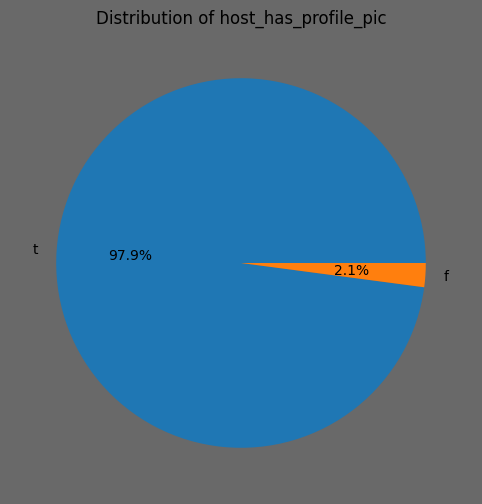


Distribution for host_identity_verified:


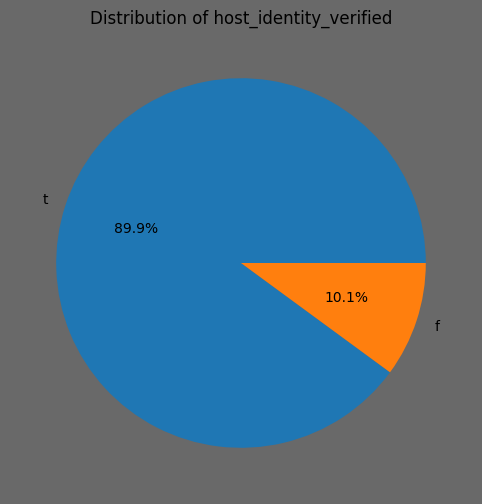


Distribution for host_is_superhost:


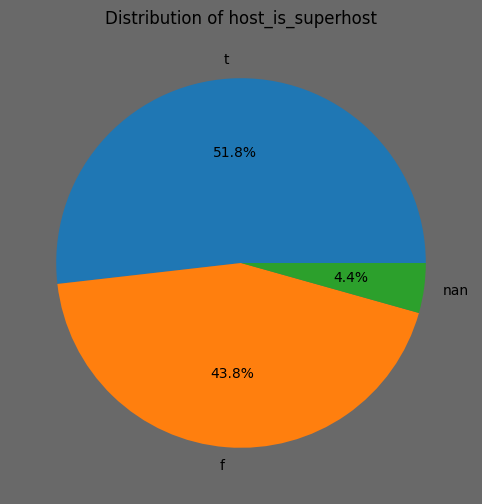


Distribution for has_availability:


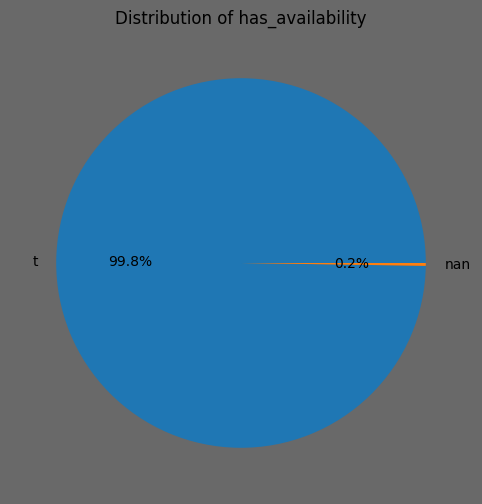


Distribution for instant_bookable:


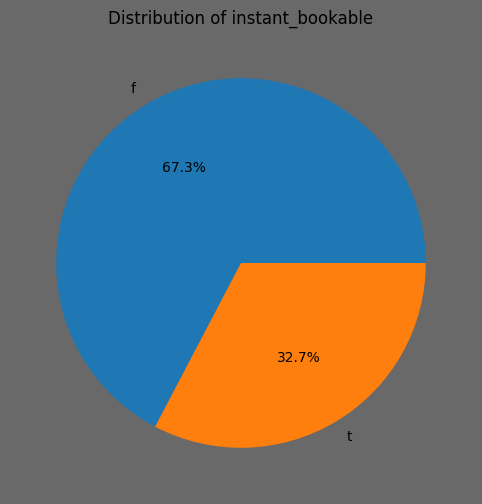


Nominal Categories:

Distribution for host_url:


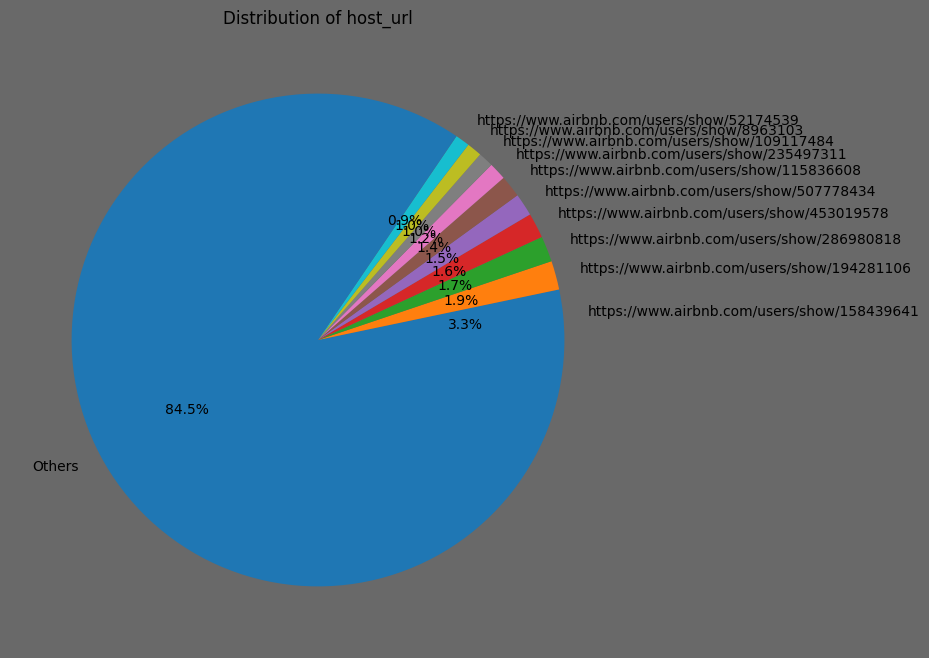


Distribution for host_location:


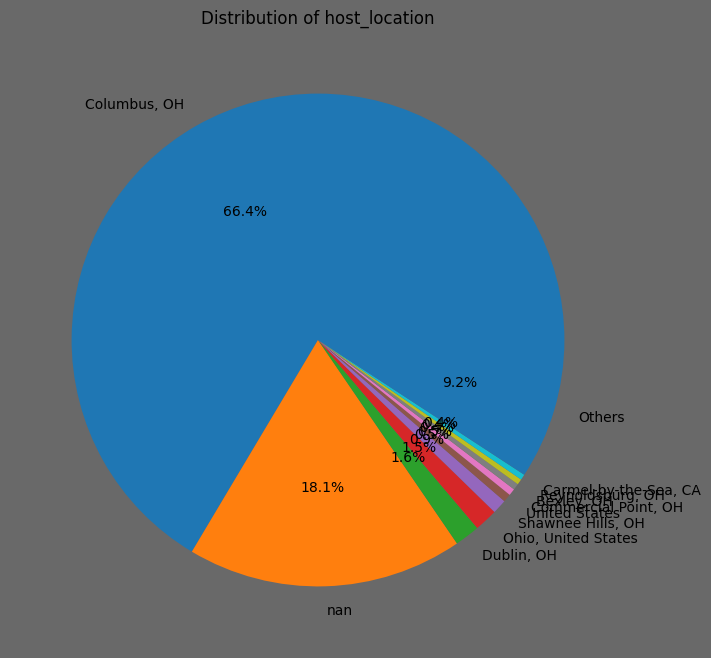


Distribution for host_neighbourhood:


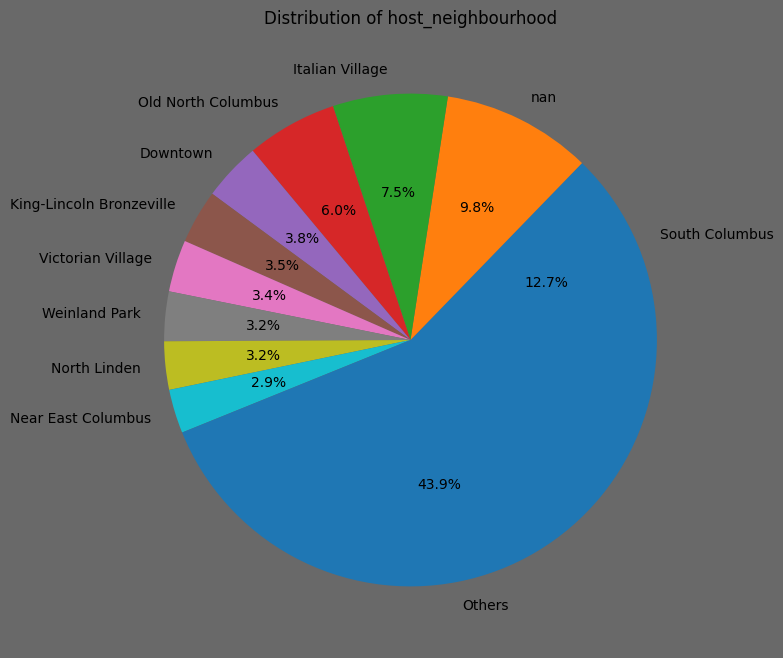


Distribution for host_verifications:


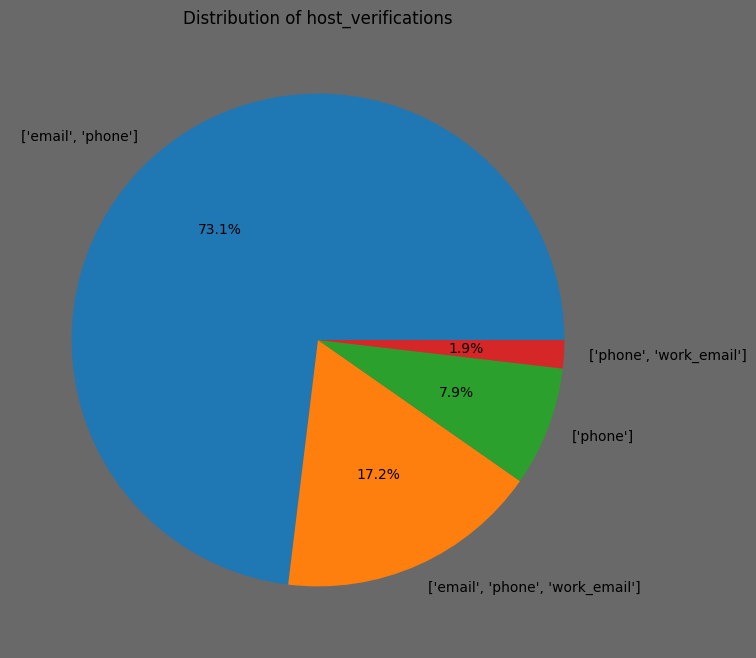


Distribution for neighbourhood_cleansed:


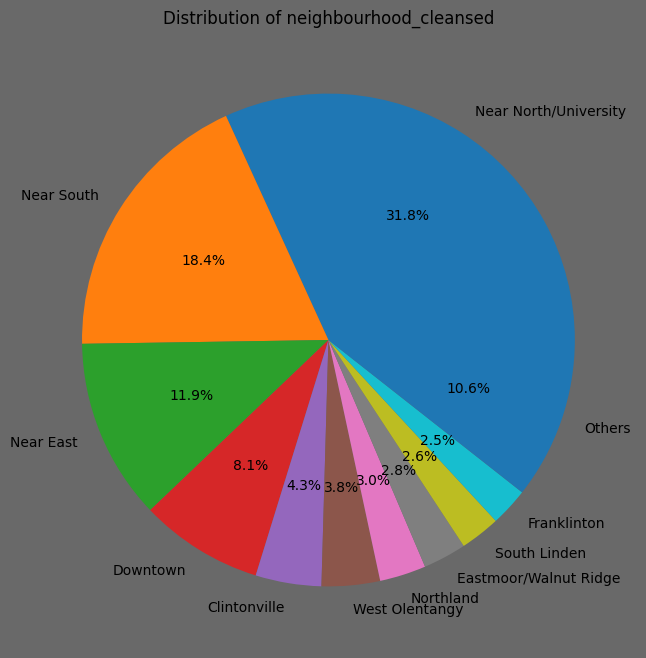


Distribution for property_type:


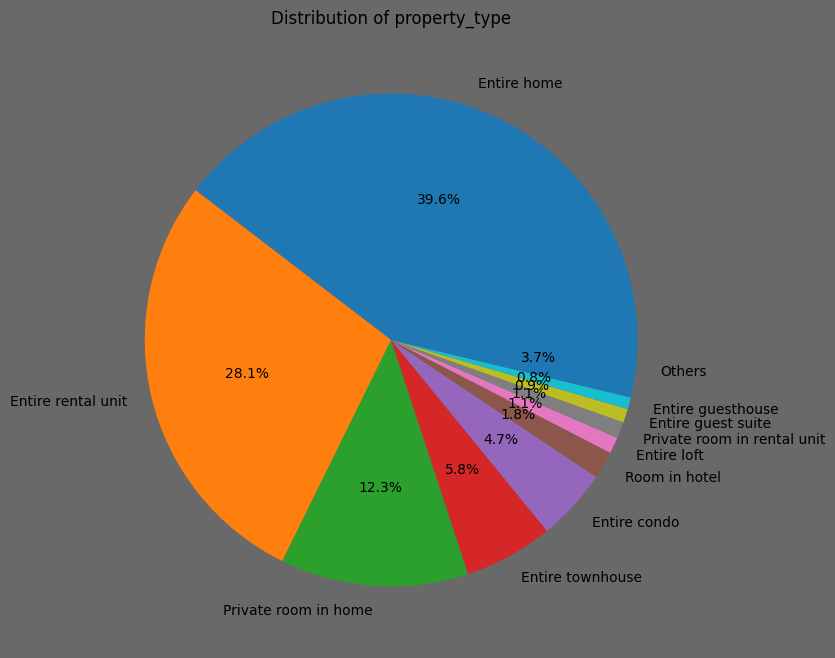


Distribution for room_type:


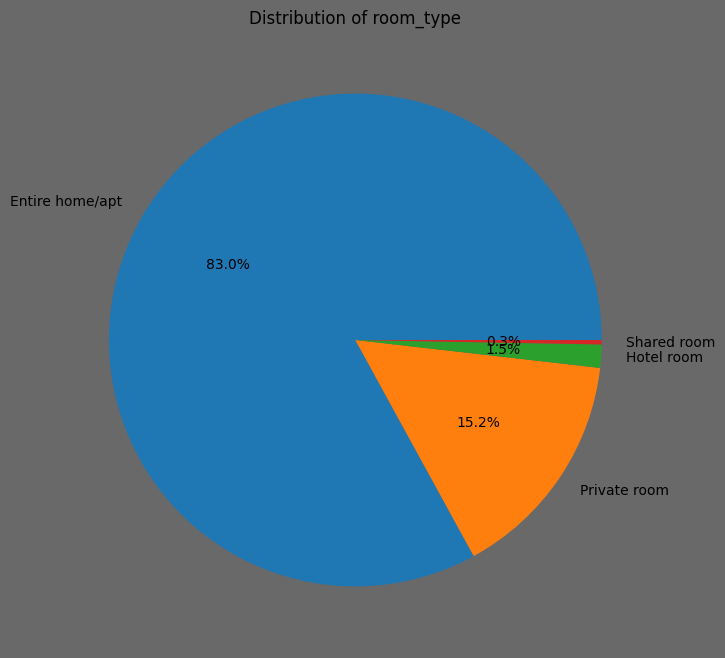


Ordinal Categories:

Distribution for host_since:


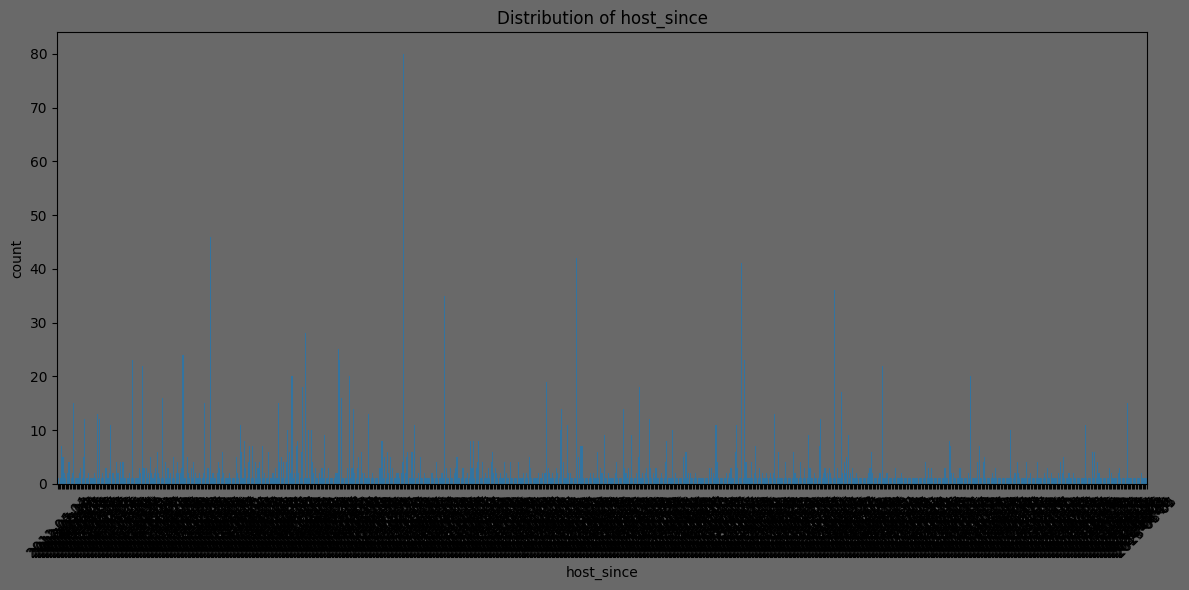


Distribution for host_response_time:


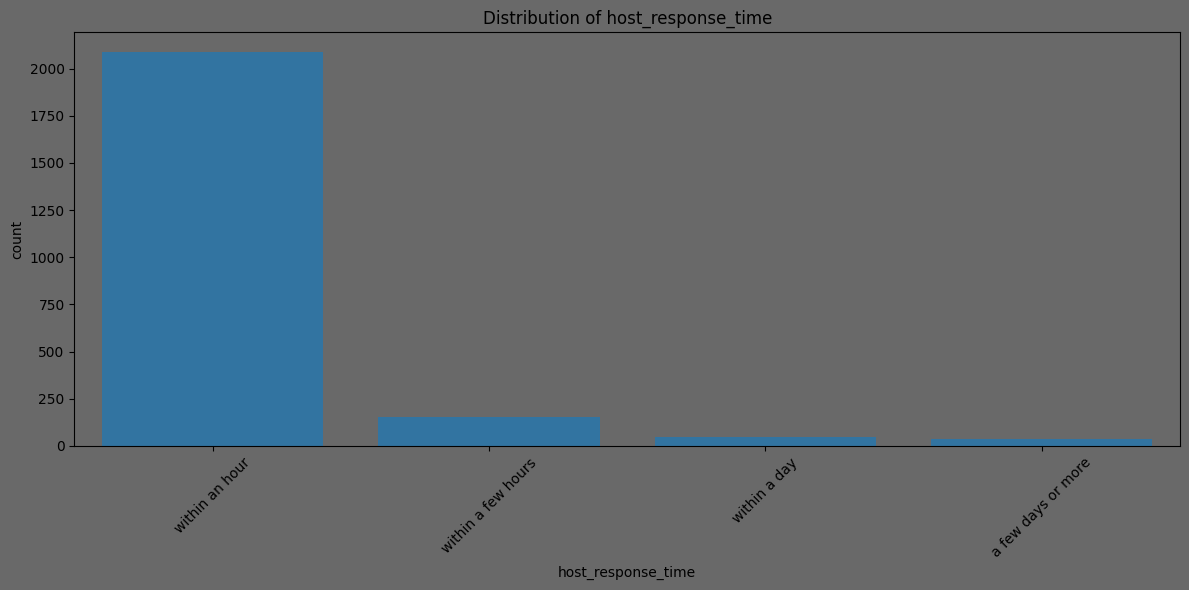


Distribution for host_response_rate:


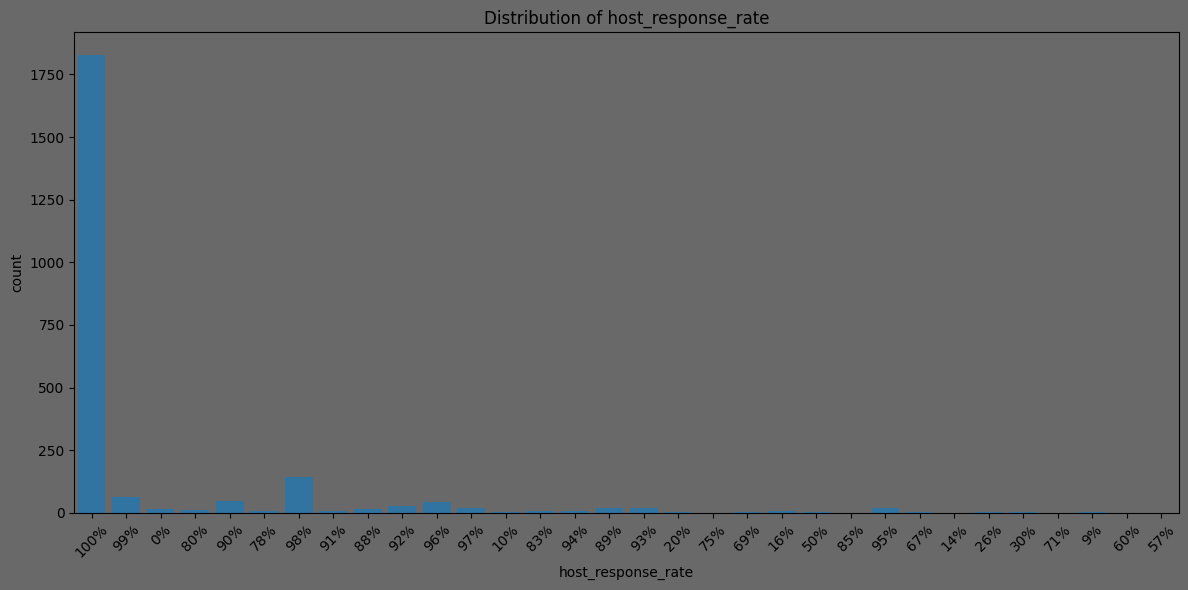


Distribution for host_acceptance_rate:


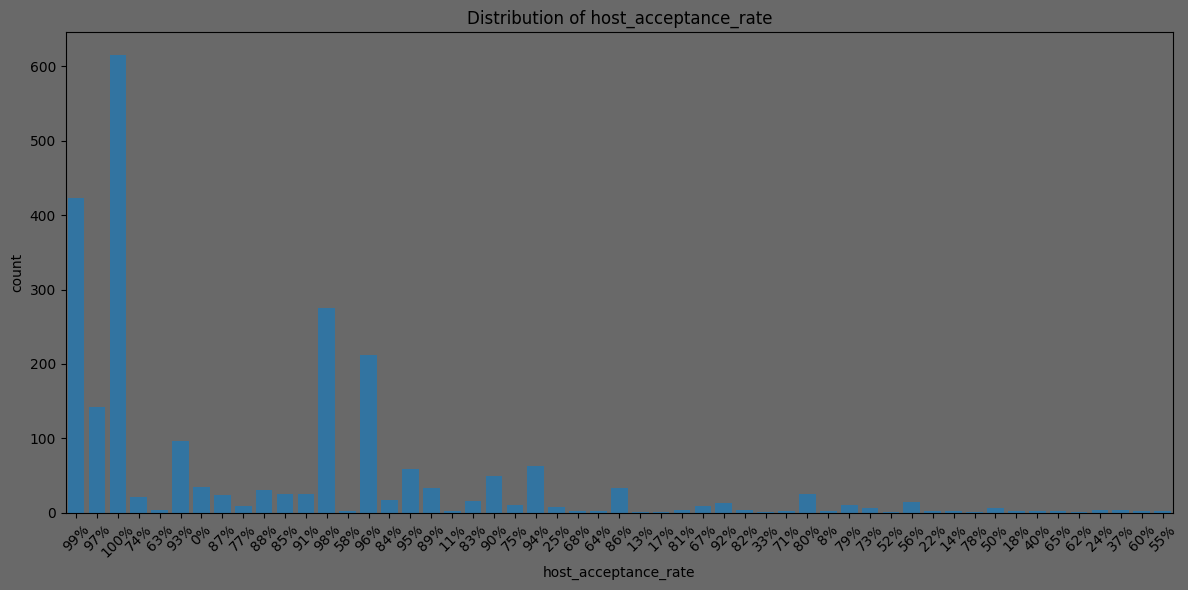


Distribution for price:


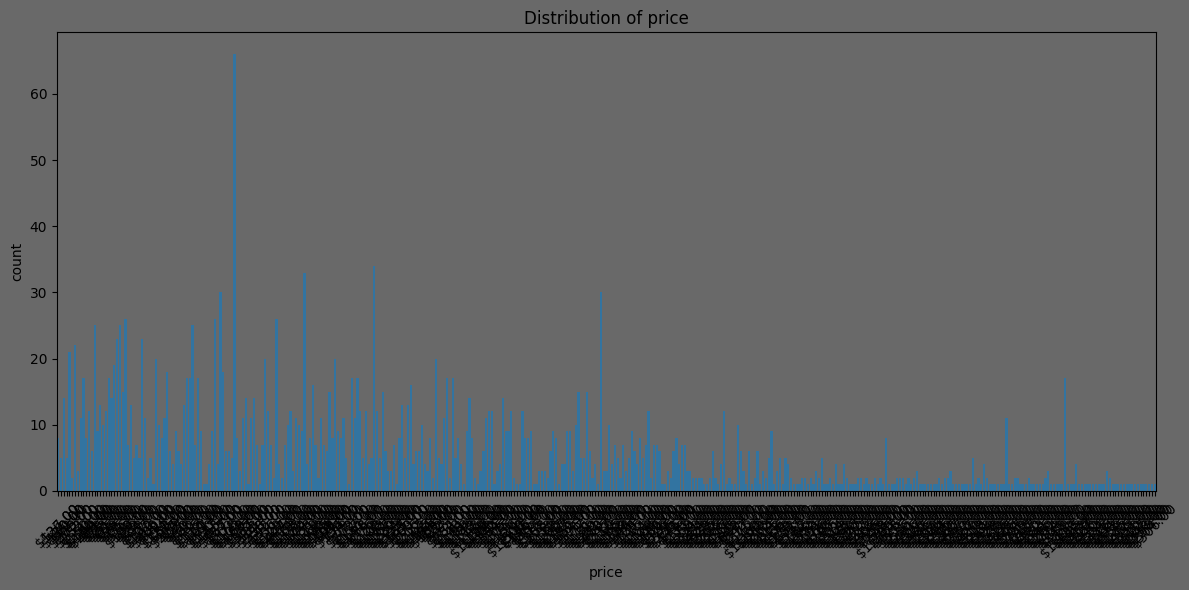


Distribution for first_review:


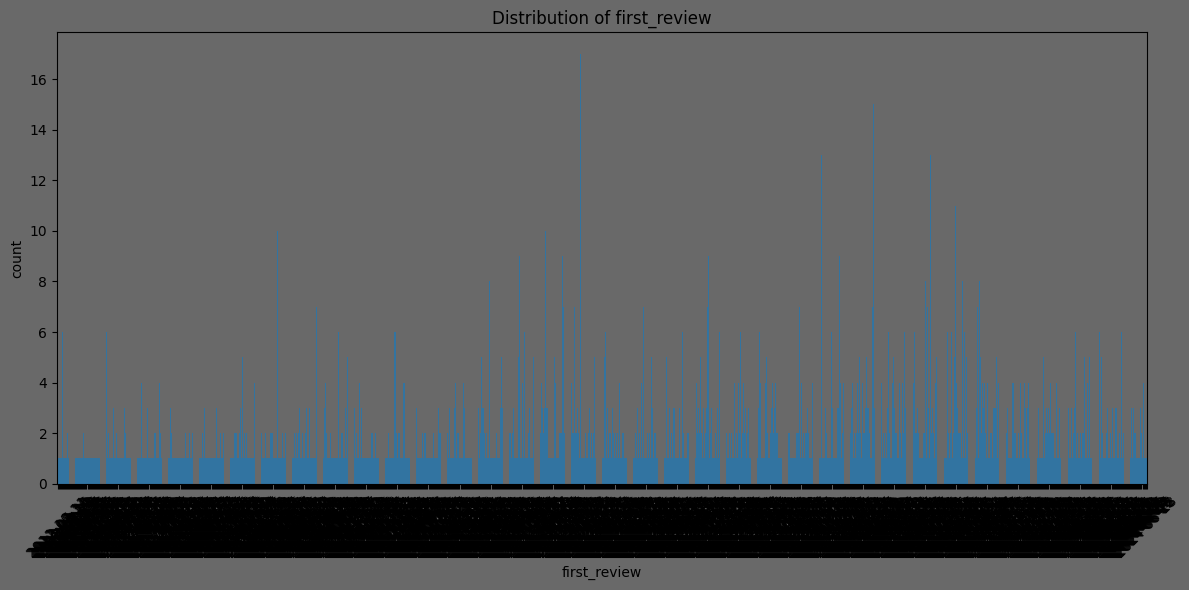


Distribution for last_review:


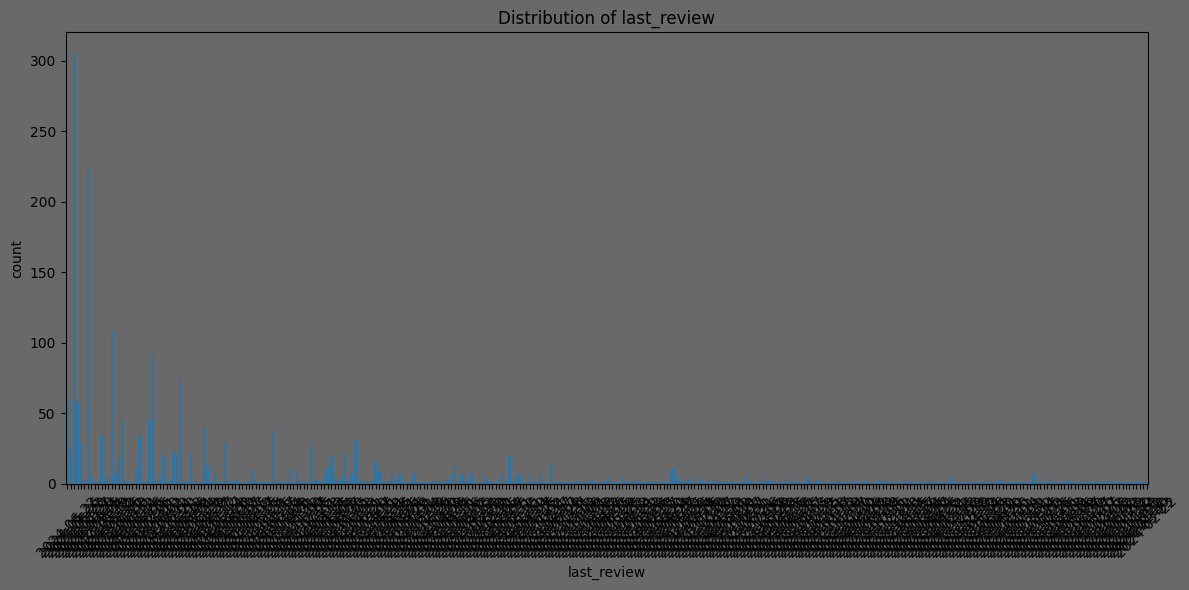


Distribution for license:


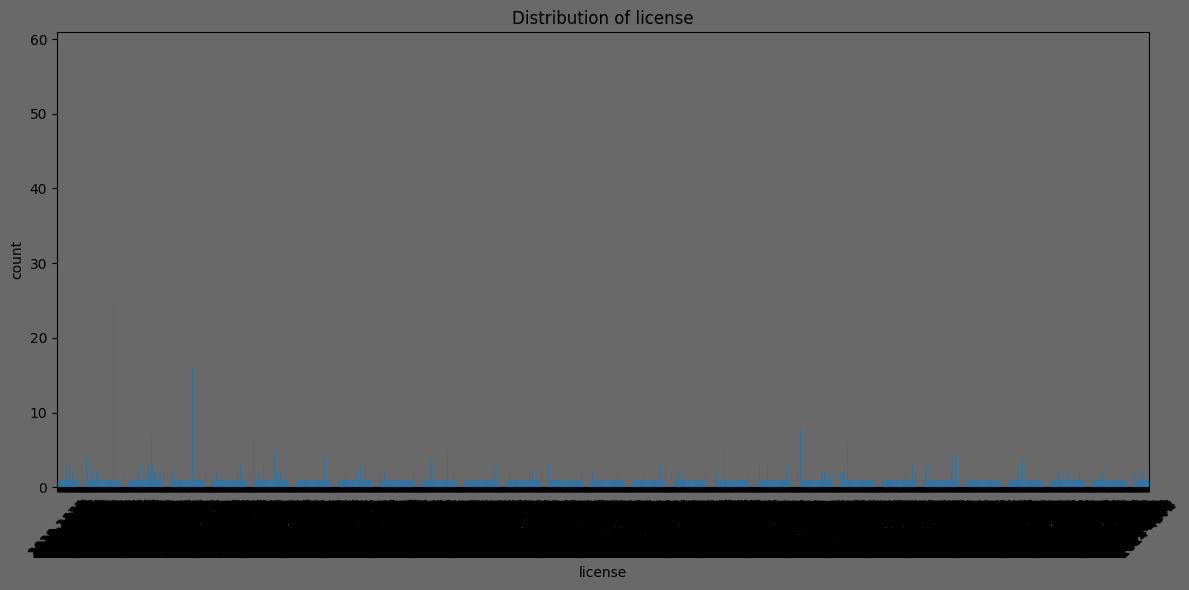

In [19]:
print("Binary Categories:")
for col in binary_categories:
    if col in X.columns:
        print(f"\nDistribution for {col}:")
        plot_binary_pie(X, col)

print("\nNominal Categories:")
for col in nominal_categories:
    if col in X.columns:
        print(f"\nDistribution for {col}:")
        plot_nominal_pie(X, col)

print("\nOrdinal Categories:")
for col in ordinal_categories:
    if col in X.columns:
        print(f"\nDistribution for {col}:")
        plot_ordinal_bar(X, col)

### Correlation Analysis

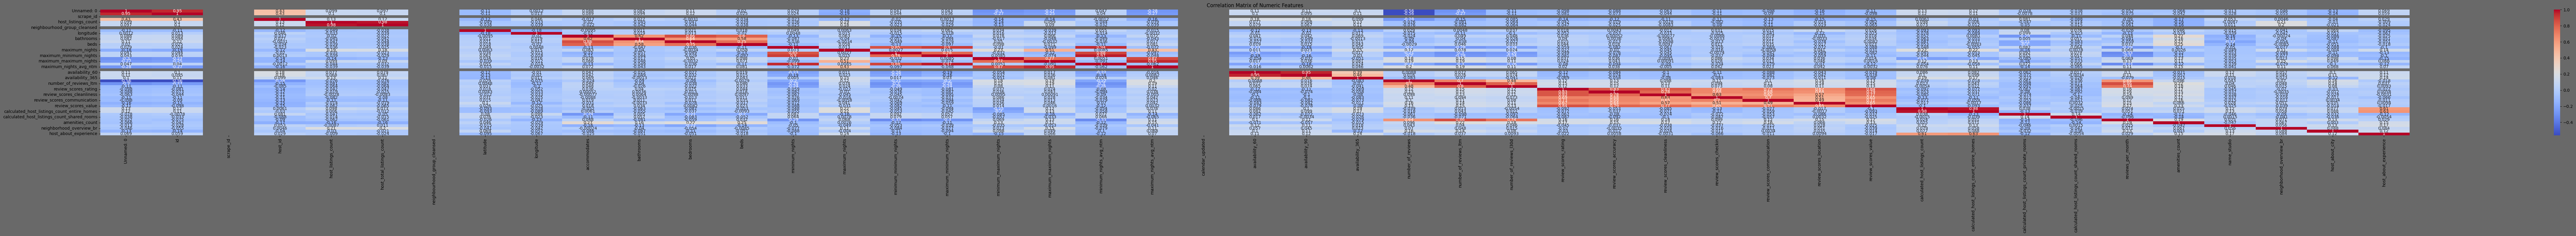

In [20]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = X[numeric_columns].corr()

plt.figure(figsize=(100, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Correlations between each feature

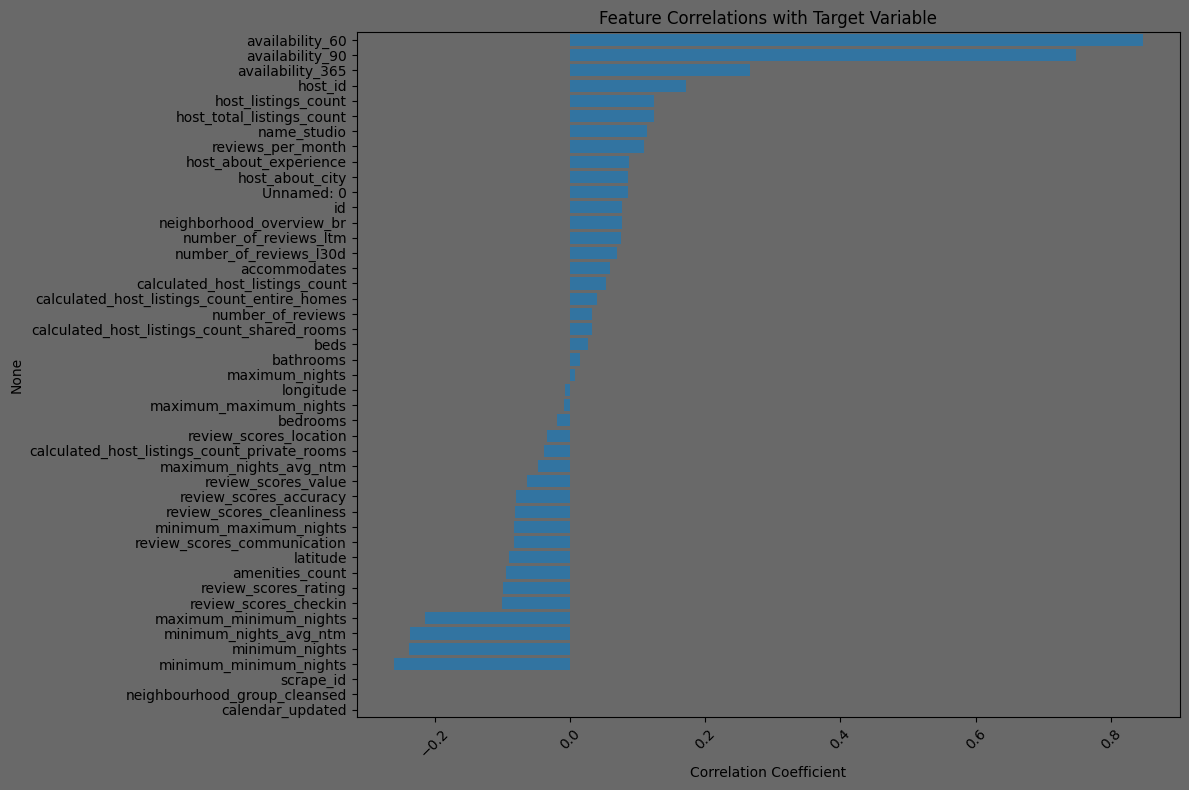


Correlations with target variable:
availability_60                                 0.846843
availability_90                                 0.748235
availability_365                                0.266661
host_id                                         0.171834
host_listings_count                             0.124484
host_total_listings_count                       0.123894
name_studio                                     0.114025
reviews_per_month                               0.109678
host_about_experience                           0.087319
host_about_city                                 0.085907
Unnamed: 0                                      0.085656
id                                              0.077516
neighborhood_overview_br                        0.077399
number_of_reviews_ltm                           0.075575
number_of_reviews_l30d                          0.069341
accommodates                                    0.058830
calculated_host_listings_count                  0.05

In [21]:
X_with_target = X[numeric_columns].copy()
X_with_target['target'] = y_numeric

target_correlations = X_with_target.corr()['target'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlations.values[1:], y=target_correlations.index[1:])
plt.title('Feature Correlations with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nCorrelations with target variable:")
print(target_correlations[1:])

## 2. Feature engineering

- Handle missing values
- Create or transform features that might improve model performance
- Examples might include creating interaction terms, encoding categorical variables, feature scaling

## 3. Model training

- Experiment with at least 3 different machine learning algorithms
- Implement hyperparameter tuning using techniques like Grid Search or Random Search
- Perform feature selection to identify relevant features
- Use cross-validation to assess model performance

## 4. Model evaluation & selection

- Measure model performance using evaluation metrics relevant to the problem
- Diagnose underfitting/overfitting
- Choose a final model based on performance and interpretability. Justify your selection

## 5. Conclusion

- Analyze feature importance to understand which features most strongly influence the prediction
- Explain how each top feature might contribute to the prediction